# 🧪 Double-Slit Experiment Simulation with Wavefunction Collapse

This notebook simulates the classic double-slit experiment in quantum mechanics, 
visualizing the collapse of the wavefunction. Fótons initially follow an interference 
pattern, but at a certain point, the wavefunction collapses and the detection pattern 
becomes uniform. A red flash highlights the collapse moment.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation
from IPython.display import HTML

In [2]:
np.random.seed(42)

num_fotons = 200
collapse_index = 100  # wavefunction collapse at this photon

# Before collapse: interference pattern (two slits)
x1 = np.random.normal(loc=-0.3, scale=0.1, size=collapse_index // 2)
x2 = np.random.normal(loc=0.3, scale=0.1, size=collapse_index // 2)
interference = np.concatenate([x1, x2])

# After collapse: uniform pattern (no interference)
no_interference = np.random.uniform(-0.5, 0.5, num_fotons - collapse_index)

# Complete pattern
detected_photons = np.concatenate([interference, no_interference])
bins = np.linspace(-1, 1, 40)
counts = np.zeros(len(bins) - 1)

Text(0, 0.5, 'Detected photons')

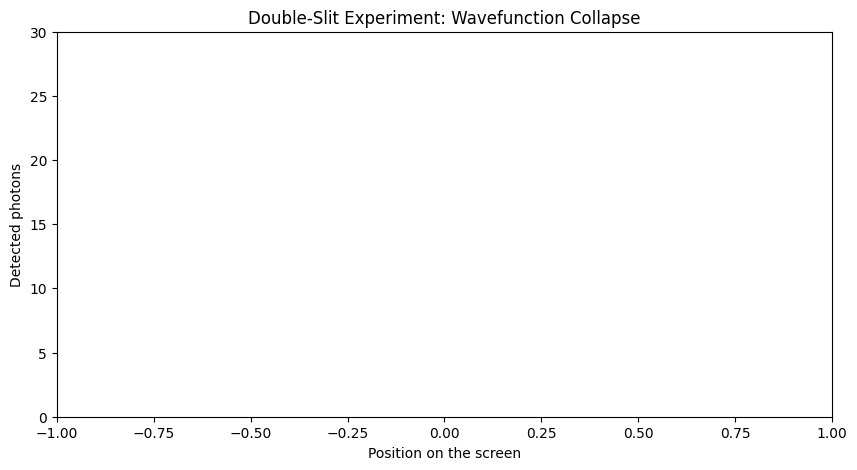

In [3]:
fig, ax = plt.subplots(figsize=(10, 5))
bars = ax.bar((bins[:-1] + bins[1:]) / 2, counts, width=0.05, color='deepskyblue')
ax.set_xlim(-1, 1)
ax.set_ylim(0, 30)
ax.set_title("Double-Slit Experiment: Wavefunction Collapse")
ax.set_xlabel("Position on the screen")
ax.set_ylabel("Detected photons")

In [4]:
def update(frame):
    if frame >= num_fotons:
        return bars

    x_new = detected_photons[frame]
    bin_index = np.searchsorted(bins, x_new) - 1

    if 0 <= bin_index < len(counts):
        counts[bin_index] += 1
        bars[bin_index].set_height(counts[bin_index])

    # Red flash on collapse
    if frame == collapse_index:
        for b in bars:
            b.set_color('red')
    elif frame == collapse_index + 3:
        for b in bars:
            b.set_color('deepskyblue')

    return bars

In [5]:
ani = animation.FuncAnimation(
    fig,
    update,
    frames=num_fotons,
    interval=50,
    blit=False,
    repeat=False
)

HTML(ani.to_jshtml())